# Analysis

In [51]:
# Convenient jupyter setup
#%load_ext autoreload
#%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline

In [54]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [168]:
import os
import xarray as xr
from src.constants import CMIP6_TS_PATH
from src.xr_utils import can_coords, clip, get_trend, spatial_mean, sel
from src.plot_utils import get_dim

In [11]:
os.listdir(CMIP6_TS_PATH)

['ts.CCCR-IITM.IITM-ESM.r1i1p1f1.80.nc',
 'ts.CAS.CAS-ESM2-0.r1i1p1f1.80.nc',
 'ts.NIMS-KMA.KACE-1-0-G.r2i1p1f1.80.nc',
 'ts.NCAR.CESM2.r4i1p1f1.80.nc',
 'ts.THU.CIESM.r1i1p1f1.80.nc',
 'ts.MOHC.HadGEM3-GC31-LL.r3i1p1f3.80.nc',
 'ts.KIOST.KIOST-ESM.r1i1p1f1.80.nc',
 'ts.NASA-GISS.GISS-E2-1-G.r4i1p3f1.80.nc',
 'ts.NASA-GISS.GISS-E2-1-G.r1i1p3f1.80.nc',
 'ts.MOHC.UKESM1-0-LL.r2i1p1f2.80.nc',
 'ts.FIO-QLNM.FIO-ESM-2-0.r1i1p1f1.80.nc',
 'ts.INM.INM-CM4-8.r1i1p1f1.80.nc',
 'ts.NCAR.CESM2.r10i1p1f1.80.nc',
 'ts.NOAA-GFDL.GFDL-CM4.r1i1p1f1.80.nc',
 'ts.NOAA-GFDL.GFDL-ESM4.r1i1p1f1.80.nc',
 'ts.CAMS.CAMS-CSM1-0.r1i1p1f1.80.nc',
 'ts.CAMS.CAMS-CSM1-0.r2i1p1f1.80.nc',
 'ts.MOHC.HadGEM3-GC31-MM.r3i1p1f3.80.nc',
 'ts.MOHC.UKESM1-0-LL.r8i1p1f2.80.nc',
 'ts.NASA-GISS.GISS-E2-1-G.r2i1p3f1.80.nc',
 'ts.CAS.FGOALS-f3-L.r1i1p1f1.80.nc',
 'ts.FIO-QLNM.FIO-ESM-2-0.r2i1p1f1.80.nc',
 'ts.MOHC.UKESM1-0-LL.r1i1p1f2.80.nc',
 'ts.CAS.FGOALS-g3.r3i1p1f1.80.nc',
 'ts.BCC.BCC-CSM2-MR.r1i1p1f1.80.nc',
 'ts.MOHC.UKE

In [12]:
len(os.listdir(CMIP6_TS_PATH))

53

In [137]:
def get_trends():
    # for i in
    tr_list = []
    fin_list = []
    for start, fin in [(x - 59, x) for x in range(2007, 2028)]:
        tr_list.append([])
        for i in range(len(os.listdir(CMIP6_TS_PATH))):
            ex = can_coords(
                xr.open_dataarray(CMIP6_TS_PATH / os.listdir(CMIP6_TS_PATH)[i])
            ).sel(T=slice(str(start), str(fin)))
            tr_list[-1].append(
                get_trend(spatial_mean(sel(ex, reg="nino3.4")), min_clim_f=True)
            )
        fin_list.append(fin)
    return xr.DataArray(
        tr_list,
        dims=["fin", "member"],
        coords=dict(fin=fin_list, member=os.listdir(CMIP6_TS_PATH)),
        attrs=dict(units="K", long_name="60 year trend in nino3.4"),
    )

In [138]:
tr_da = get_trends()

In [146]:
from src.constants import DATA_PATH
tr_da.to_netcdf(DATA_PATH / "ts_trends_ensemble.nc")

Text(0, 0.5, 'End year')

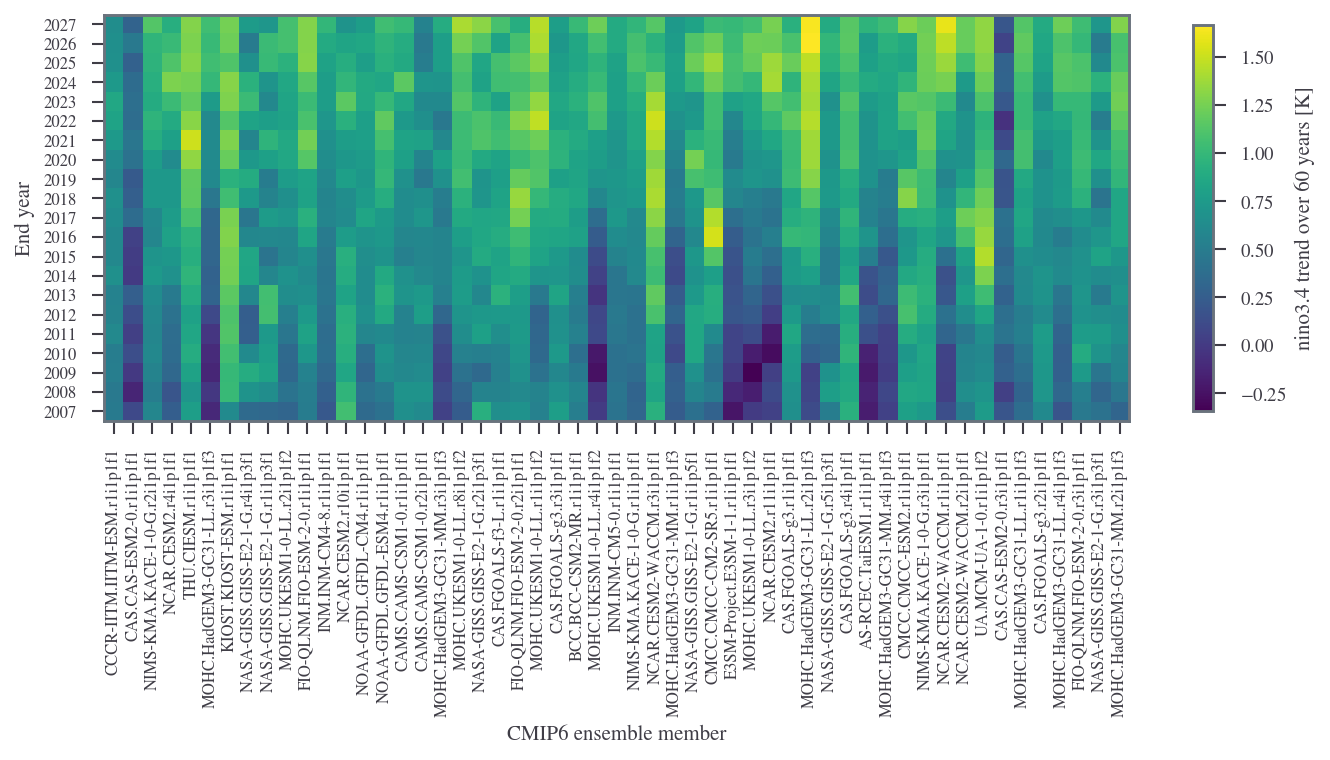

In [183]:
fig, ax = plt.subplots(1, figsize=get_dim(fraction_of_line_width=2))
plt.imshow(tr_da.values)
plt.colorbar(label="nino3.4 trend over 60 years [K]", shrink=0.5)
# plt.xlabel([str(x) for x in tr_da.member.values], list(range(len(tr_da.member.values))))
labels =[str(x).strip("ts.").strip(".80.nc") for x in tr_da.member.values]
locs = list(range(len(labels)))
ax.set_xticks(np.asarray(locs))
ax.set_xticklabels(np.asarray(labels), fontsize=8, rotation=90)
labels =[str(x) for x in tr_da.fin.values]
locs = list(range(len(labels)))
ax.set_yticks(np.asarray(locs))
ax.set_yticklabels(np.asarray(labels), fontsize=8,)#  rotation=90)
ax.invert_yaxis()
plt.xlabel("CMIP6 ensemble member")
plt.ylabel("End year")

mmm 0.757703735462886
tot num 53


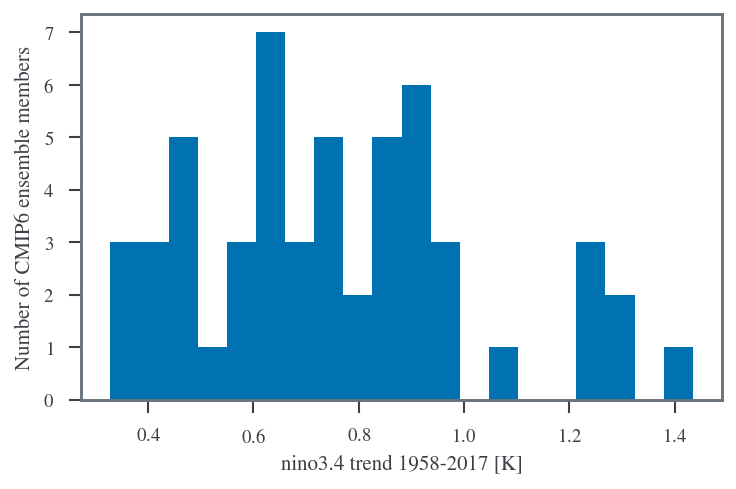

In [186]:
plt.hist(tr_da.sel(fin=2017).values, bins=20)
plt.xlabel("nino3.4 trend 1958-2017 [K]")
plt.ylabel("Number of CMIP6 ensemble members")
print("mmm", np.mean(tr_list))
print("tot num", len(tr_list))

In [144]:
tr_da.member.astype(str)

<xarray.DataArray 'member' (member: 53)>
array(['ts.CCCR-IITM.IITM-ESM.r1i1p1f1.80.nc',
       'ts.CAS.CAS-ESM2-0.r1i1p1f1.80.nc',
       'ts.NIMS-KMA.KACE-1-0-G.r2i1p1f1.80.nc',
       'ts.NCAR.CESM2.r4i1p1f1.80.nc', 'ts.THU.CIESM.r1i1p1f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-LL.r3i1p1f3.80.nc',
       'ts.KIOST.KIOST-ESM.r1i1p1f1.80.nc',
       'ts.NASA-GISS.GISS-E2-1-G.r4i1p3f1.80.nc',
       'ts.NASA-GISS.GISS-E2-1-G.r1i1p3f1.80.nc',
       'ts.MOHC.UKESM1-0-LL.r2i1p1f2.80.nc',
       'ts.FIO-QLNM.FIO-ESM-2-0.r1i1p1f1.80.nc',
       'ts.INM.INM-CM4-8.r1i1p1f1.80.nc', 'ts.NCAR.CESM2.r10i1p1f1.80.nc',
       'ts.NOAA-GFDL.GFDL-CM4.r1i1p1f1.80.nc',
       'ts.NOAA-GFDL.GFDL-ESM4.r1i1p1f1.80.nc',
       'ts.CAMS.CAMS-CSM1-0.r1i1p1f1.80.nc',
       'ts.CAMS.CAMS-CSM1-0.r2i1p1f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-MM.r3i1p1f3.80.nc',
       'ts.MOHC.UKESM1-0-LL.r8i1p1f2.80.nc',
       'ts.NASA-GISS.GISS-E2-1-G.r2i1p3f1.80.nc',
       'ts.CAS.FGOALS-f3-L.r1i1p1f1.80.nc',
       'ts.FIO-QLNM.FIO-ESM-2-0.r2i1p1f1.80.nc',
...
       'ts.E3SM-Project.E3SM-1-1.r1i1p1f1.80.nc',
       'ts.MOHC.UKESM1-0-LL.r3i1p1f2.80.nc',
       'ts.NCAR.CESM2.r11i1p1f1.80.nc', 'ts.CAS.FGOALS-g3.r1i1p1f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-LL.r2i1p1f3.80.nc',
       'ts.NASA-GISS.GISS-E2-1-G.r5i1p3f1.80.nc',
       'ts.CAS.FGOALS-g3.r4i1p1f1.80.nc',
       'ts.AS-RCEC.TaiESM1.r1i1p1f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-MM.r4i1p1f3.80.nc',
       'ts.CMCC.CMCC-ESM2.r1i1p1f1.80.nc',
       'ts.NIMS-KMA.KACE-1-0-G.r3i1p1f1.80.nc',
       'ts.NCAR.CESM2-WACCM.r1i1p1f1.80.nc',
       'ts.NCAR.CESM2-WACCM.r2i1p1f1.80.nc',
       'ts.UA.MCM-UA-1-0.r1i1p1f2.80.nc',
       'ts.CAS.CAS-ESM2-0.r3i1p1f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-LL.r1i1p1f3.80.nc',
       'ts.CAS.FGOALS-g3.r2i1p1f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-LL.r4i1p1f3.80.nc',
       'ts.FIO-QLNM.FIO-ESM-2-0.r3i1p1f1.80.nc',
       'ts.NASA-GISS.GISS-E2-1-G.r3i1p3f1.80.nc',
       'ts.MOHC.HadGEM3-GC31-MM.r2i1p1f3.80.nc'], dtype='<U39')
Coordinates:
  * member   (member) <U39 'ts.CCCR-IITM.IITM-ESM.r1i1p1f1.80.nc' ... 'ts.MOH...

In [136]:
tr_da.member

<xarray.DataArray (member: 53)>
array([ 0.47860473,  0.10494746,  0.58412911,  0.26301986,  0.78209397,
       -0.10926026,  0.62313012,  0.35666544,  0.34007281,  0.31130811,
        0.5013846 ,  0.21379226,  1.05756607,  0.35489655,  0.40948187,
        0.66103743,  0.62357352,  0.05054451,  0.24290711,  0.92978403,
        0.65088508,  0.68410212,  0.54118088,  0.78590509,  0.51901871,
        0.0116982 ,  0.42361236,  0.32642287,  0.93284537,  0.24515536,
        0.3985243 ,  0.28897576, -0.2286183 ,  0.00888547,  0.04485377,
        0.66010579,  0.1179075 ,  0.51213714,  0.93759004, -0.17761593,
        0.04581725,  0.79967138,  0.74368278,  0.14169762,  0.51162321,
        0.76552177,  0.19329022,  0.3740878 ,  0.61214116,  0.1897165 ,
        0.47274046,  0.41382869,  0.31587091])
Coordinates:
    fin      int64 2007
  * member   (member) <U39 'ts.CCCR-IITM.IITM-ESM.r1i1p1f1.80.nc' ... 'ts.MOH...
Attributes:
    units:      K
    long_name:  60 year trend in nino3.4

In [84]:
xr.DataArray([tr_list], dims=["fin", "member"], coords=dict(fin=[2017], member=os.listdir(CMIP6_TS_PATH)), attrs=dict(units="K", long_name="60 year trend in nino3.4"))

<xarray.DataArray (fin: 1, member: 53)>
array([[0.63682845, 0.37045548, 0.59820148, 0.76865943, 1.09129002,
        0.32816076, 1.26385817, 0.45139411, 0.75884257, 0.71179954,
        0.93725871, 0.57284182, 0.62731344, 0.83875113, 0.75771868,
        0.63379037, 0.71486442, 0.47006587, 0.88317763, 0.8487236 ,
        0.86611891, 1.2460825 , 0.8876216 , 0.89640824, 0.77869605,
        0.37535886, 0.72759543, 0.60259705, 1.31787842, 0.45380299,
        0.68737734, 1.43466363, 0.39173895, 0.47694233, 0.42398078,
        0.91202121, 0.96492048, 0.62580599, 0.97500428, 0.54869966,
        0.44514607, 0.90493474, 0.92259347, 0.78319122, 1.22397565,
        1.29865538, 0.40552193, 0.85047027, 0.61738376, 0.65262629,
        0.72604366, 0.61927605, 0.85116913]])
Coordinates:
  * fin      (fin) int64 2017
  * member   (member) <U39 'ts.CCCR-IITM.IITM-ESM.r1i1p1f1.80.nc' ... 'ts.MOH...
Attributes:
    units:      K
    long_name:  60 year trend in nino3.4

In [73]:
xr.open_dataarray(CMIP6_TS_PATH / os.listdir(CMIP6_TS_PATH)[i])

<xarray.DataArray 'ts' (time: 960, y: 161, x: 361)>
[55796160 values with dtype=float32]
Coordinates:
  * time         (time) datetime64[ns] 1948-01-15 1948-02-15 ... 2027-12-15
    lon          (x, y) float64 ...
    lat          (x, y) float64 ...
    member_id    object ...
  * x            (x) int64 0 1 2 3 4 5 6 7 8 ... 353 354 355 356 357 358 359 360
  * y            (y) int64 -80 -79 -78 -77 -76 -75 -74 ... 74 75 76 77 78 79 80
    institution  object ...
    model        object ...
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Temperature of the lower boundary of the atmosphere
    history:        2020-03-25T02:30:56Z altered by CMOR: Converted type from...
    long_name:      Surface Temperature
    original_name:  TS
    standard_name:  surface_temperature
    units:          K

In [86]:
[(x-59, x) for x in range(2007, 2028)]

[(1948, 2007),
 (1949, 2008),
 (1950, 2009),
 (1951, 2010),
 (1952, 2011),
 (1953, 2012),
 (1954, 2013),
 (1955, 2014),
 (1956, 2015),
 (1957, 2016),
 (1958, 2017),
 (1959, 2018),
 (1960, 2019),
 (1961, 2020),
 (1962, 2021),
 (1963, 2022),
 (1964, 2023),
 (1965, 2024),
 (1966, 2025),
 (1967, 2026),
 (1968, 2027)]

In [82]:
xr.DataArray(tr_list, dims=["member"], coords=dict(member=os.listdir(CMIP6_TS_PATH)), attrs=dict(units="K", long_name="60 year trend in nino3.4"))

<xarray.DataArray (member: 53)>
array([0.63682845, 0.37045548, 0.59820148, 0.76865943, 1.09129002,
       0.32816076, 1.26385817, 0.45139411, 0.75884257, 0.71179954,
       0.93725871, 0.57284182, 0.62731344, 0.83875113, 0.75771868,
       0.63379037, 0.71486442, 0.47006587, 0.88317763, 0.8487236 ,
       0.86611891, 1.2460825 , 0.8876216 , 0.89640824, 0.77869605,
       0.37535886, 0.72759543, 0.60259705, 1.31787842, 0.45380299,
       0.68737734, 1.43466363, 0.39173895, 0.47694233, 0.42398078,
       0.91202121, 0.96492048, 0.62580599, 0.97500428, 0.54869966,
       0.44514607, 0.90493474, 0.92259347, 0.78319122, 1.22397565,
       1.29865538, 0.40552193, 0.85047027, 0.61738376, 0.65262629,
       0.72604366, 0.61927605, 0.85116913])
Coordinates:
  * member   (member) <U39 'ts.CCCR-IITM.IITM-ESM.r1i1p1f1.80.nc' ... 'ts.MOH...
Attributes:
    units:      K
    long_name:  60 year trend in nino3.4

In [80]:
tr_list

[0.636828445170229,
 0.3704554758779284,
 0.5982014838234841,
 0.7686594250748818,
 1.0912900211939942,
 0.3281607626074586,
 1.2638581702950582,
 0.45139410777852507,
 0.7588425656551554,
 0.7117995363283879,
 0.9372587097654229,
 0.5728418206634821,
 0.627313443097674,
 0.8387511300613317,
 0.7577186837627972,
 0.63379036674845,
 0.7148644222042453,
 0.47006586954375706,
 0.8831776296301961,
 0.8487236027401031,
 0.8661189089195436,
 1.2460825030862857,
 0.8876215961192628,
 0.8964082398624751,
 0.7786960524158714,
 0.3753588609952147,
 0.7275954339244481,
 0.6025970482860531,
 1.3178784157717687,
 0.45380299256411477,
 0.6873773383092767,
 1.4346636269974324,
 0.39173895035498296,
 0.4769423252682271,
 0.42398078164007863,
 0.9120212122653941,
 0.9649204802691778,
 0.6258059856021996,
 0.9750042768675043,
 0.5486996614997488,
 0.44514607302696557,
 0.9049347375949308,
 0.9225934656434732,
 0.7831912177805816,
 1.2239756458400972,
 1.2986553798994533,
 0.40552193423352567,
 0.8504702

(array([6., 7., 9., 8., 7., 9., 1., 0., 4., 2.]),
 array([0.31197744, 0.42180011, 0.53162278, 0.64144545, 0.75126812,
        0.86109079, 0.97091346, 1.08073613, 1.1905588 , 1.30038147,
        1.41020414]),
 <BarContainer object of 10 artists>)

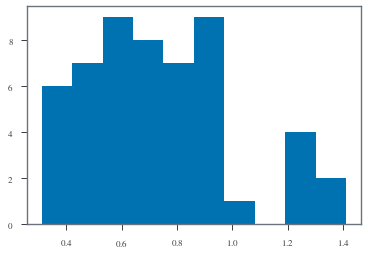

In [53]:
plt.hist(tr_list)

mmm 0.757703735462886
tot num 53


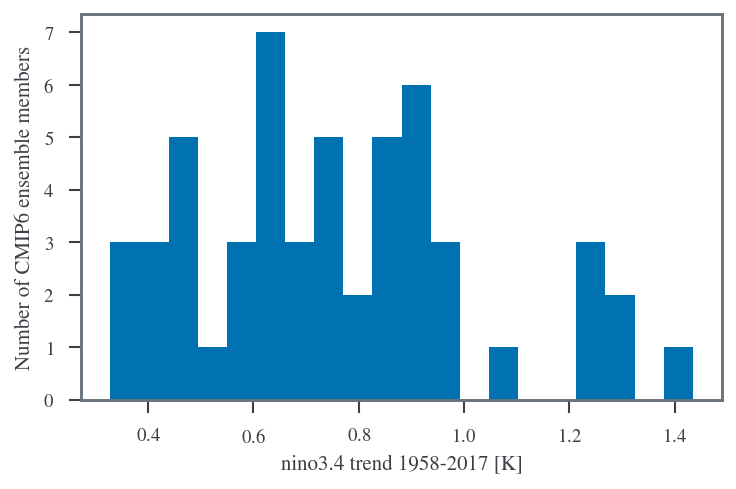

In [69]:
import numpy as np
plt.hist(tr_list, bins=20)
plt.xlabel("nino3.4 trend 1958-2017 [K]")
plt.ylabel("Number of CMIP6 ensemble members")
print("mmm", np.mean(tr_list))
print("tot num", len(tr_list))

In [32]:
from src.xr_utils import spatial_mean, sel

In [34]:
ex = can_coords(xr.open_dataarray(CMIP6_TS_PATH / os.listdir(CMIP6_TS_PATH)[0]))

In [52]:
import matplotlib.pyplot as plt
get_trend(spatial_mean(sel(ex, reg="nino3.4")))
# plt.show()

0.8413575246546752